<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/MIAP/blob/main/MIAP_HW1_99101462.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALIREZA KHALEGHI ANAGHIZI**

# **99101462**

#***Q1***

# **1.1**

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import nibabel as nib

file_path = '/content/drive/MyDrive/MIAP/sub-0001_space-MNI_T1w.nii'

imges = nib.load(file_path)

arrays_of_data = imges.get_fdata()

print(f'Shape: {arrays_of_data.shape}')
print(f'Data type: {arrays_of_data.dtype}')

Shape: (207, 243, 226)
Data type: float64


خود فایل را به صورت پیش فرض خارج کردیم و همه دیتا ها را در داخل گوگل درایو ذخیره کردیم و در مرحله بعدی آن ها را از درایو لود کرده ایم.

# **1.2**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
slice_90 = arrays_of_data[:, :, 90]


در بالا اسلایس 90 را ذخیره کردیم.

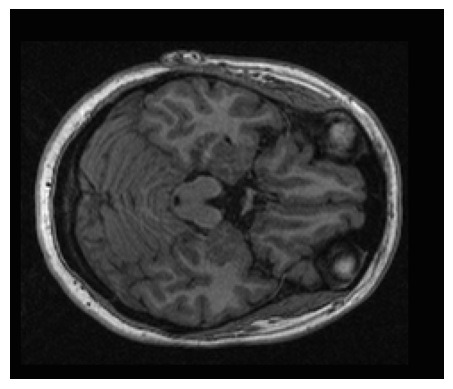

(-0.5, 179.5, 179.5, -0.5)

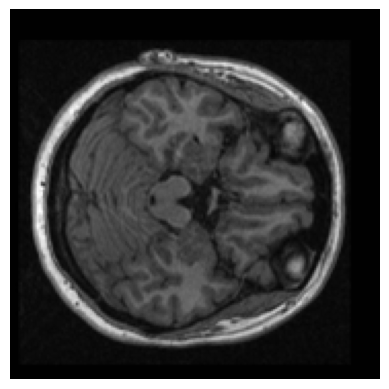

In [6]:
from PIL import Image
plt.imshow(slice_90, cmap='gray')
plt.axis('off')
plt.savefig('slice_90.png', bbox_inches='tight', pad_inches=0)
plt.show()
loaded_img = plt.imread('slice_90.png')

norm_img = np.array(loaded_img / np.max(loaded_img))
resized_img = Image.fromarray((norm_img*255 ).astype(np.uint8))


# Resize the image to 180x180
resized_img = (resized_img.resize((180, 180)))
resized_img=resized_img.convert('L')
resized_img.save('mri_reshaped.png')
plt.imshow(resized_img, cmap='gray')
plt.axis('off')


در تصویر بالا ابتدا تصویر اسلایس 90 را نمایش دادیم و سپس نرمالایز کرده ایم بر بیشترین مقدارش تقسیم کردیم و در 255 ضرب کردیم که معادل بیشترین سطح روشنایی است.

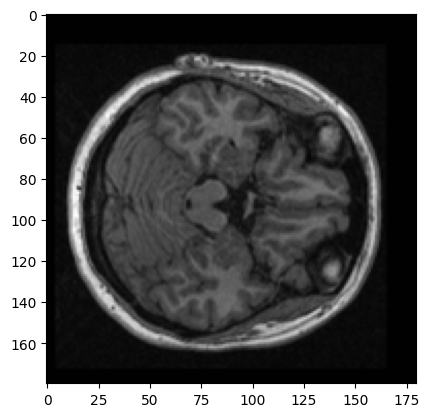

In [10]:

mri_reshaped = plt.imread('mri_reshaped.png')
mri_reshaped=mri_reshaped/np.max(np.max(mri_reshaped))
plt.imshow(mri_reshaped, cmap='gray')

In [11]:
print(np.max(np.max(mri_reshaped)))

1.0


در بالا میبینیم که تصویر نرمالایز شده است و مقدار ماکسیمم آن برابر یک است.

# **1.3**

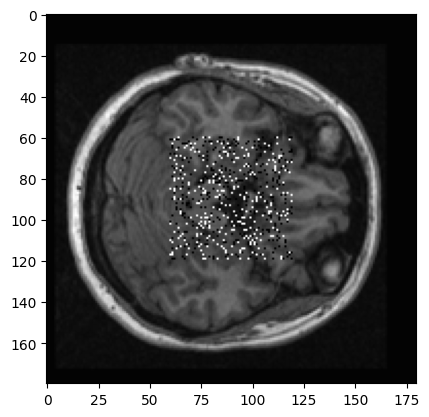

In [12]:

def add_salt_and_pepper_noise(image, amount):
    noisy_image = np.copy(image)
    height, width = image.shape
    num_noise_pixels = int(amount * height * width)
    salt_coords = [np.random.randint(0, dim, num_noise_pixels) for dim in [height, width]]
    for i in range(num_noise_pixels):
      noisy_image[salt_coords[0][i]][salt_coords[1][i]] = 1
    pepper_coords = [np.random.randint(0, dim, num_noise_pixels) for dim in [height, width]]
    for i in range(num_noise_pixels):
      noisy_image[pepper_coords[0][i]][pepper_coords[1][i]]  = 0
    return noisy_image
def add_noise_to_center(image, noise_dimension, amount):
    noisy_image = np.copy(image)
    height, width = image.shape
    noise_height, noise_width = noise_dimension
    center_x = int((width - noise_width) / 2)
    center_y = int((height - noise_height) / 2)
    center_patch = noisy_image[center_y:center_y+noise_height, center_x:center_x+noise_width]
    noisy_center_patch = add_salt_and_pepper_noise(center_patch, amount)
    noisy_image[center_y:center_y+noise_height, center_x:center_x+noise_width] = noisy_center_patch
    return noisy_image
noisy_center_image = add_noise_to_center(mri_reshaped, (60, 60), 0.1)
plt.imshow(noisy_center_image, cmap='gray')


در این قسمت یک بلاک را انتخاب کردیم و مختصاتش را دادیم و نویز نمک و فلفل را به آن اضافه کردیم .

برای اضافه کردن این نویز یک سری مختصات را به صورت رندوم یک و یک سری دیگر را به صورت رندوم 0 کردیم.

مشخصه نویز گفته شده واریانس زیاد آن است

# **1.4  ,1.5**

In [13]:
def calculate_block_variance(block):
  return np.var(block)

block_size = 60
block_cords = []
for i in range(int(len(noisy_center_image)/block_size)):
  for j in range(int(len(noisy_center_image)/block_size)):
    block_cords.append([i*block_size,j*block_size])

variances = []
for i in range(len(block_cords)):
  variances.append(calculate_block_variance(noisy_center_image[block_cords[i][0]:block_cords[i][0]+block_size,block_cords[i][1]:block_cords[i][1]+block_size]))
max_block_var=block_cords[variances.index(max(variances))]

در تابع بالا یک بلاک را میدهیم و واریانس آن را حساب میکنیم.

در قسمت بعدی در 9 بلاک تصویر که 60*60 هستند تقسیم کردیم و واریانسش را حساب کردیم .

In [14]:
max_block_var

[60, 60]

در بالا نیز مختصات اولین پیکسل بلاکی که بیشترین واریانس را دارد به دست آوردیم

که همان بلاکی است که نویز نمک فلفل در آن اضافه شده است.

چون به این صورت است که این نویز ماکسیمم اختلاف بین نمک و فلفل را دارد در نتیجه نویز بیشینه میشود

In [15]:
variances

[0.036611117,
 0.0332658,
 0.02975287,
 0.038536105,
 0.055430666,
 0.028509017,
 0.034470852,
 0.025085276,
 0.027842063]

# **1.6**

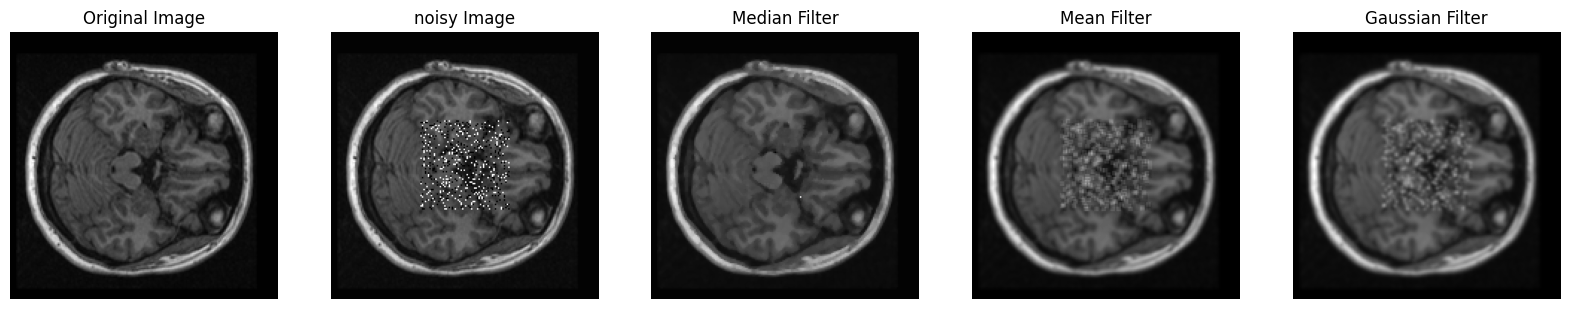

In [16]:
from scipy.ndimage import median_filter, uniform_filter, gaussian_filter
import matplotlib.pyplot as plt

max_variance_block = noisy_center_image[max_block_var[0]:max_block_var[0]+block_size,max_block_var[1]:max_block_var[1]+block_size]

filtered_image_median = median_filter(noisy_center_image, size=3)

filtered_image_mean = uniform_filter(noisy_center_image, size=3)

filtered_image_gaussian = gaussian_filter(noisy_center_image, sigma=1)

plt.figure(figsize=(20, 20))

plt.subplot(1,5, 1)
plt.imshow(mri_reshaped, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(noisy_center_image, cmap='gray')
plt.title('noisy Image')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(filtered_image_median, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(filtered_image_mean, cmap='gray')
plt.title('Mean Filter')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(filtered_image_gaussian, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

plt.show()


بهترین فیلتر برای نویز موجود فیلتر مدین یا میانه است که در نتیجه این فیلتر میبینیم تصویر تا حد ممکن بازیابی شده و اثر نویز حذف شده فیلتر گوسی و میانگین هردو تصویر را تا حد ممکن مات میکنند و لبه ها را از بین میبرند شاید اثر نویز کم شود اما تصویر به خوبی بازیابی نشده است.

# **1.7**

In [18]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_absolute_error

ssim_median = ssim(mri_reshaped, filtered_image_median)
ssim_mean = ssim(mri_reshaped, filtered_image_mean)
ssim_gaussian = ssim(mri_reshaped, filtered_image_gaussian)

mae_median = mean_absolute_error(mri_reshaped.flatten(), filtered_image_median.flatten())
mae_mean = mean_absolute_error(mri_reshaped.flatten(), filtered_image_mean.flatten())
mae_gaussian = mean_absolute_error(mri_reshaped.flatten(), filtered_image_gaussian.flatten())

print("SSIM for Median Filtered Image:", ssim_median)
print("SSIM for Uniform Filtered Image:", ssim_mean)
print("SSIM for Gaussian Filtered Image:", ssim_gaussian)

print("MAE for Median Filtered Image:", mae_median)
print("MAE for Uniform Filtered Image:", mae_mean)
print("MAE for Gaussian Filtered Image:", mae_gaussian)


SSIM for Median Filtered Image: 0.9769054606058809
SSIM for Uniform Filtered Image: 0.9203657624965725
SSIM for Gaussian Filtered Image: 0.9235291006738754
MAE for Median Filtered Image: 0.008468284
MAE for Uniform Filtered Image: 0.020003358
MAE for Gaussian Filtered Image: 0.02047946


معیار Structural Similarity Index Measurement (SSIM) یک روش برای اندازه‌گیری تشابه بین دو تصویر است. این معیار از ابزارهای پرکاربرد در پردازش تصویر است و برای ارزیابی کیفیت تصاویر استفاده می‌شود. SSIM با توجه به سه عنصر اصلی شامل سطح رنگ، ساختار و کنتراست، تشابه بیشینه بین دو تصویر را محاسبه می‌کند.

از سوی دیگر، median absolute error یک معیار اندازه‌گیری خطای میانگین مطلق میانه بین دو تصویر است. این معیار برای اندازه‌گیری فاصله بین دو تصویر استفاده می‌شود و محاسبه می‌کند که چقدر تفاوت میان دو تصویر وجود دارد.

بنابراین، SSIM برای اندازه‌گیری تشابه و شباهت بین دو تصویر استفاده می‌شود در حالی که median absolute error برای اندازه‌گیری خطای مطلق بین دو تصویر به کار می‌رود.


همانطور که از نتایج میگیریم برای فیلتر مدین و میانه هم مقدار خطای میانه خیلی کم است و هم مقدار ssim بیشتر از روش های دیگر است .

اما دو فیلتر دیگر ما تقریبا نتایج یکسانی دارند.

#***Q2***

(-0.5, 353.5, 339.5, -0.5)

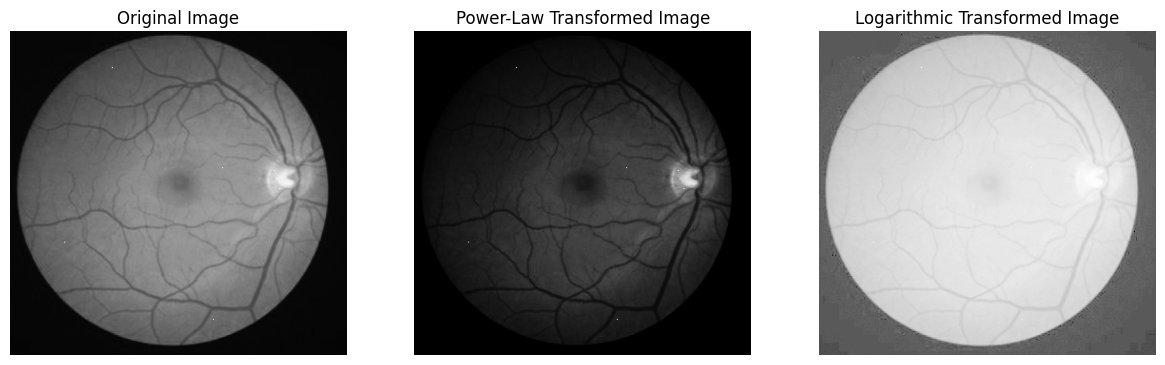

In [21]:
import cv2
import numpy as np

file_path = '/content/drive/MyDrive/MIAP/retina.png'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

gamma =2.5
power_law_image = np.power(image/255.0, gamma) * 255.0
power_law_image = np.uint8(power_law_image)

logarithmic_image = np.log1p(image) * 255 / np.log1p(255)
logarithmic_image = np.uint8(logarithmic_image)



plt.figure(figsize=(20, 20))

plt.subplot(1,4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4, 2)
plt.imshow(power_law_image, cmap='gray')
plt.title('Power-Law Transformed Image')
plt.axis('off')

plt.subplot(1,4, 3)
plt.imshow(logarithmic_image, cmap='gray')
plt.title('Logarithmic Transformed Image')
plt.axis('off')





در تصاویر بالا مقدار پارامتر گاما برای پاور لا را مقدار 2.5 قرار داده ایم همانطور که میبینیم سطح روشنایی به شدت پایین آمده و تصویر تا حد امکان تیره شده است.
روش لگاریتمی سطح روشنایی به شدت بالا رفته است و نواحی که سطح روشنایی به شدت کمی دارند تقریبا تیره  مانده اند.

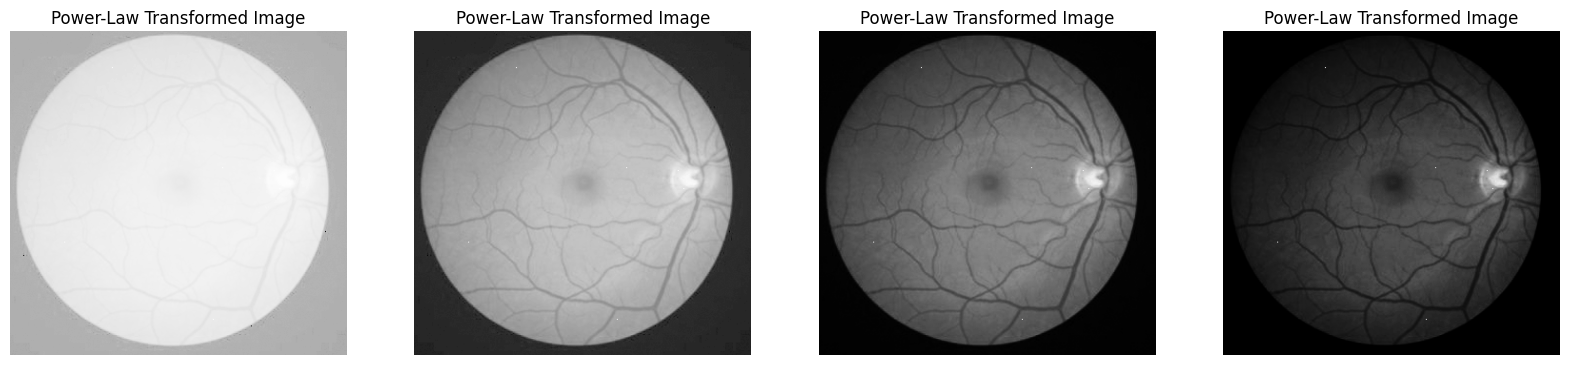

In [22]:
i=0
plt.figure(figsize=(20, 20))
for gamma in [0.1, 0.5, 1.2, 2.2]:
  i=i+1
  power_law_image = np.power(image/255.0, gamma) * 255.0
  power_law_image = np.uint8(power_law_image)
  plt.subplot(1,4, i)
  plt.imshow(power_law_image, cmap='gray')
  plt.title('Power-Law Transformed Image')
  plt.axis('off')

در تصاویر بالا به ازای مقادیر مختلف گاما مقدار سطح روشنایی را میبینیم که به ازای مقدار کم گاما روشنایی کل به شدت افزایش یافته است و تصویر تا حد ممکن سفید شده است ولی به ازای گاما های بزرگتر سطح روشنایی کمتر شده است.

#***Q3***

(-0.5, 799.5, 899.5, -0.5)

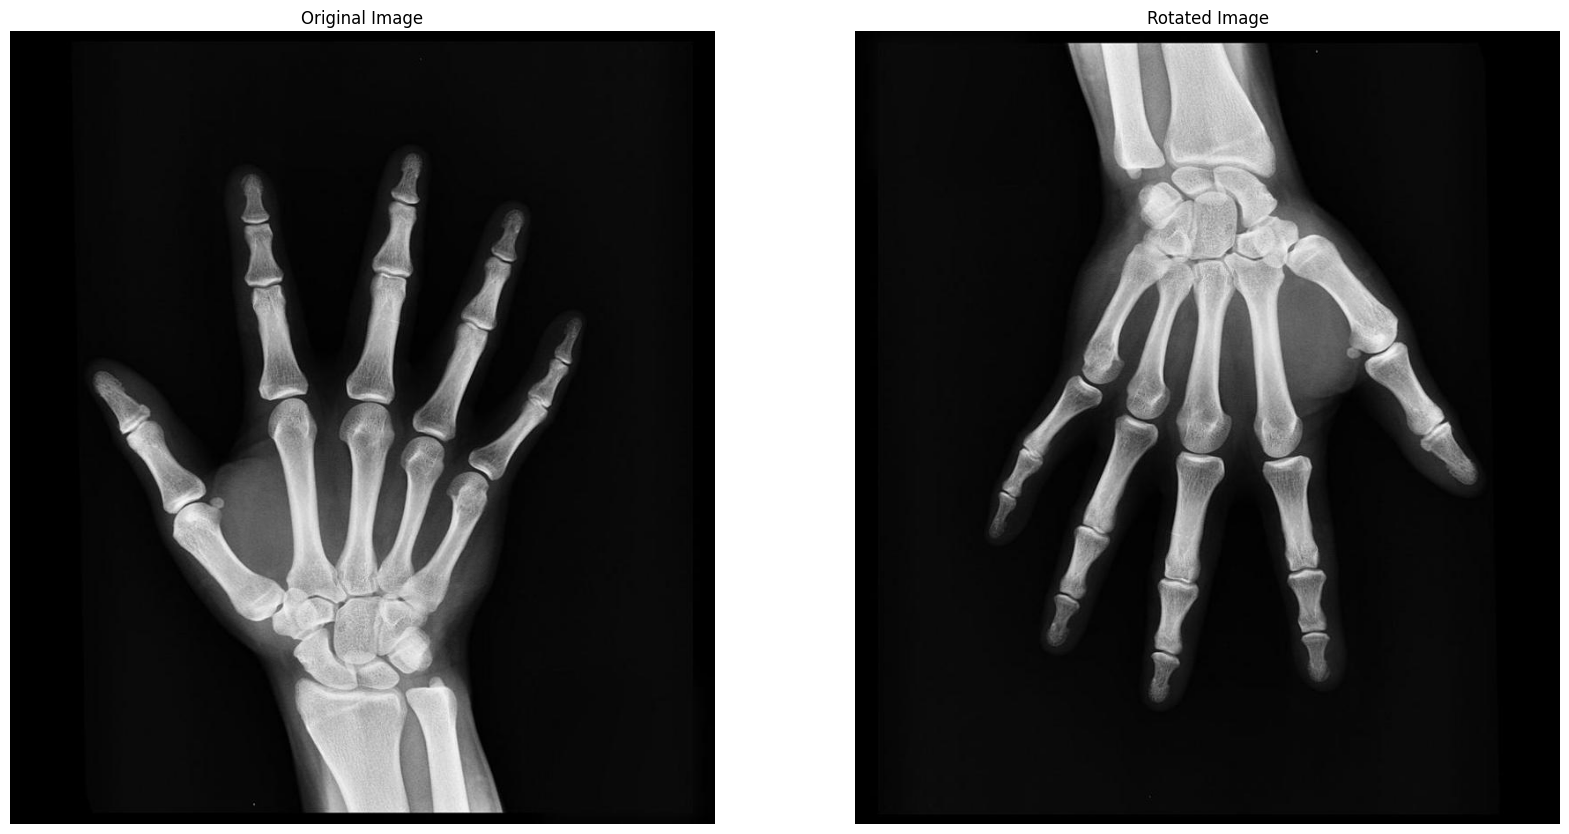

In [25]:
import numpy as np
from scipy.ndimage import rotate
from scipy.fftpack import fft2,ifft2,fftshift,ifftshift
from matplotlib.pyplot import subplots,cm

file_path = '/content/drive/MyDrive/MIAP/hand_xray.jpg'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

F_img = fftshift(fft2(image))
angle=180
r = rotate(F_img.real,angle,reshape=False,mode='wrap')
i = rotate(F_img.imag,angle,reshape=False,mode='wrap')
rF_img= r+1j*i
IrF_img = np.abs(ifft2(ifftshift(rF_img)))

plt.figure(figsize=(20, 20))
plt.subplot(1,2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2, 2)
plt.imshow(IrF_img, cmap='gray')
plt.title('Rotated Image')
plt.axis('off')

با توجه به تبدیل فوریه دو بعدی می دانیم که دوران در حوزه مکان معادل دوران در حوزه فرکانس و fft  میباشد

پس کافی است ابتدا فوریه را بگیریم و سپس یه شیفت مرکزی هم دادیم و از دکارتی به دورانی تبدیل کردیم و سپس یک دوران 180 درجه فرکانسی دادیم و فوریه معکوس و شیفت فوریه معکوس گرفتیم و از نتیجه مختلط یک قدر مطلق و ااندازه گرفتیم نتیجه به شکل  بالا در آمده است.

#***Q4***

(-0.5, 240.5, 151.5, -0.5)

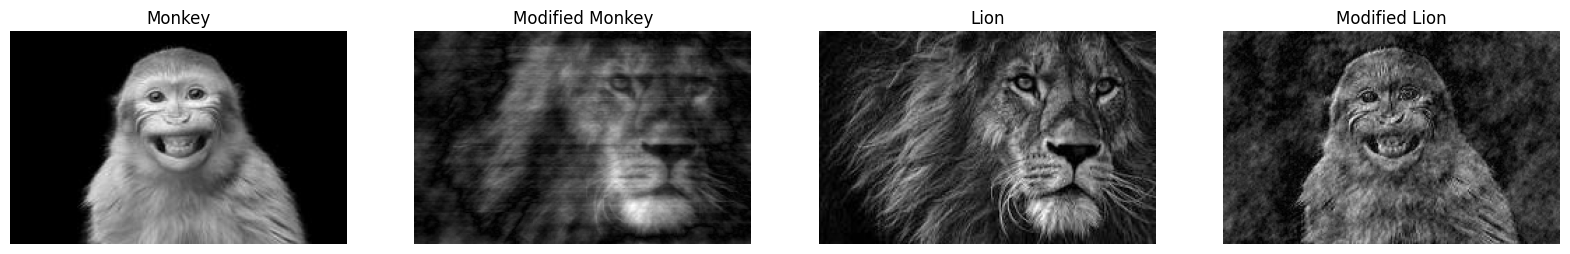

In [24]:
import cv2
import numpy as np

file_path1 = '/content/drive/MyDrive/MIAP/monkey.jpg'
file_path2 = '/content/drive/MyDrive/MIAP/lion.jpg'
image1 = cv2.imread(file_path1, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(file_path2, cv2.IMREAD_GRAYSCALE)


fshift1 = fftshift(fft2(image1))
fshift2 = fftshift(fft2(image2))

magnitude1, phase1 = cv2.cartToPolar(np.real(fshift1), np.imag(fshift1))
magnitude2, phase2 = cv2.cartToPolar(np.real(fshift2), np.imag(fshift2))

relfshift_m1p2, imfshift_m1p2 = (cv2.polarToCart(magnitude1, phase2))
relfshift_m2p1, imfshift_m2p1 = (cv2.polarToCart(magnitude2, phase1))
fshift_m1p2= relfshift_m1p2+1j*imfshift_m1p2
fshift_m2p1= relfshift_m2p1+1j*imfshift_m2p1

image_m1p2 = ifft2(ifftshift(fshift_m1p2))
image_m1p2 = np.abs(image_m1p2)
image_m2p1 = ifft2(ifftshift(fshift_m2p1))
image_m2p1 = np.abs(image_m2p1)



plt.figure(figsize=(20, 20))
plt.subplot(1,4, 1)
plt.imshow(image1, cmap='gray')
plt.title('Monkey')
plt.axis('off')

plt.subplot(1,4, 2)
plt.imshow(image_m1p2, cmap='gray')
plt.title('Modified Monkey')
plt.axis('off')

plt.subplot(1,4, 3)
plt.imshow(image2, cmap='gray')
plt.title('Lion')
plt.axis('off')

plt.subplot(1,4, 4)
plt.imshow(image_m2p1, cmap='gray')
plt.title('Modified Lion')
plt.axis('off')

با توجه به نتایج بالا میبینیم که در هر تصویر فاز اثر گذار تر از دامنه است به صورتی که در تصاویری که فاز میمون را با دامنه شیر ئداریم تصویر بیشتر شبیه میمون شده است.

#***Q5***

# **الف**

(-0.5, 353.5, 339.5, -0.5)

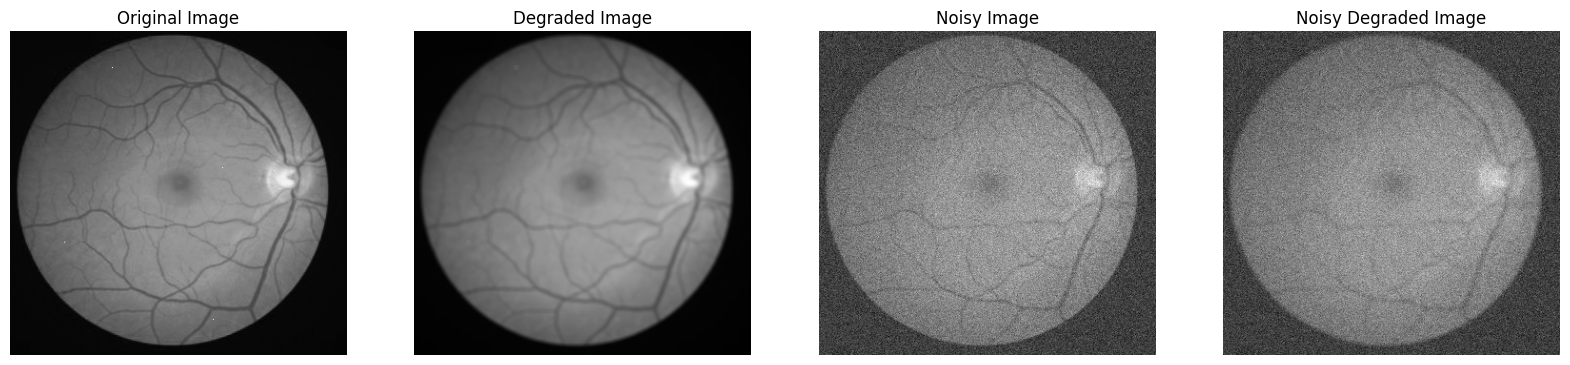

In [27]:
import cv2
import numpy as np

def degredation_filter(image, filter_size):
    return cv2.blur(image, (filter_size, filter_size))

def calculate_psnr(original_image, reconstructed_image):
    mse = np.mean((original_image - reconstructed_image) ** 2)
    psnr = 10 * np.log10((255 ** 2) / mse)
    return psnr

file_path = '/content/drive/MyDrive/MIAP/retina.png'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

degraded_image = degredation_filter(image, 5)

noise = np.random.normal(0, 25, image.shape)
noisy_image = image + noise

noisy_degraded_img = degraded_image +noise

plt.figure(figsize=(20, 20))
plt.subplot(1,4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4, 2)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.axis('off')

plt.subplot(1,4, 3)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1,4, 4)
plt.imshow(noisy_degraded_img, cmap='gray')
plt.title('Noisy Degraded Image')
plt.axis('off')


# **ب**

معیار Signal-to-Noise Ratio (SNR) یک معیار اندازه‌گیری کیفیت تصویر است که نسبت سیگنال به نویز را نشان می‌دهد. Peak Signal-to-Noise Ratio (PSNR) نیز یک نوع SNR است که بعنوان یک معیار محبوب برای اندازه‌گیری کیفیت تصویر استفاده می‌شود. PSNR معیاری است که بر اساس مقادیر پیکل تصویر و خطای متوسط مربوط به تفاوت بین تصویر اصلی و تصویر فشرده شده، به دست می‌آید.

نحوه محاسبه آن نیز به صورت لگاریتم نسبت بیشترین مقدار پیکسل به مقدار کل توان دو اختلاف تصویر اصلی به تصویر بازیابی شده.

در بالا تصویر اول تصویر اصلی و تصویر بعدی تنها دیگریشن و تصویر سوم تنها نویز و تصویر آخر دیگریشن همراه با نویز است که تصویر آخر بیشتر از بقیه تصاویر محو شده است.

# **ج**

In [28]:
psnr_n=calculate_psnr(image, noisy_image)
psnr_d=calculate_psnr(image, degraded_image)
psnr_nd=calculate_psnr(image, noisy_degraded_img)

print(f'PSNR for degraded image: {psnr_d} dB')
print(f'PSNR for noisy image: {psnr_n} dB')
print(f'PSNR for reconstructed image: {psnr_nd} dB')

PSNR for degraded image: 36.940936965977784 dB
PSNR for noisy image: 20.14935826563501 dB
PSNR for reconstructed image: 20.034518326891046 dB


همانطور که میبینید تصویر تنها دیگریشن مقدار این PSNR آن به شدت بالا است که نشان میدهد تصویر بیشتر خمحو شده است ولی بقیه تصاویر که نویز نیز دارند این مقدار تقریبا یکسان است.

/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1657: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1657: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


PSNR for degraded image: nan dB
PSNR for noisy image: 30.683896579897024 dB
PSNR for reconstructed image: 29.68158599834528 dB


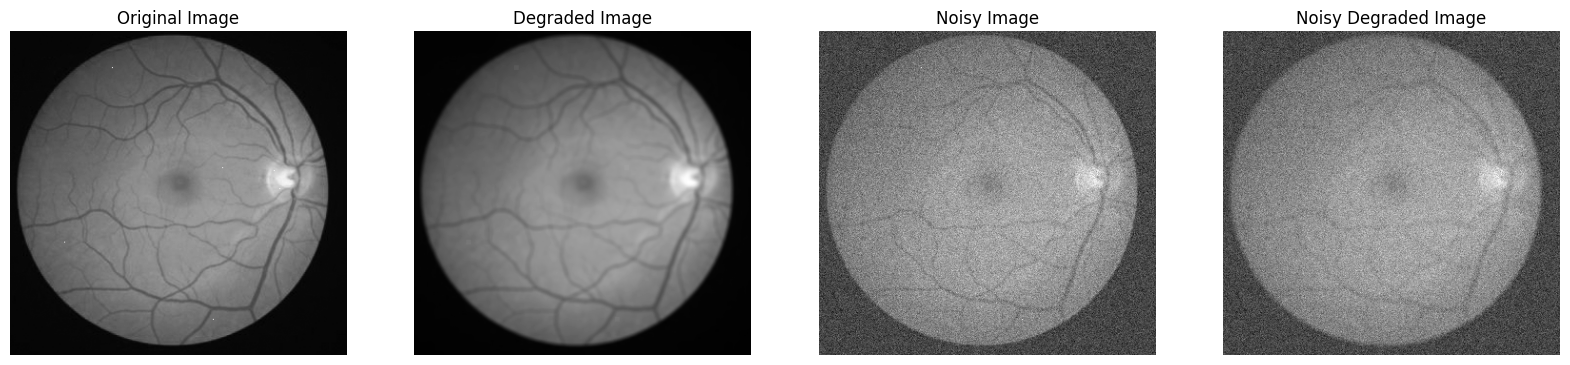

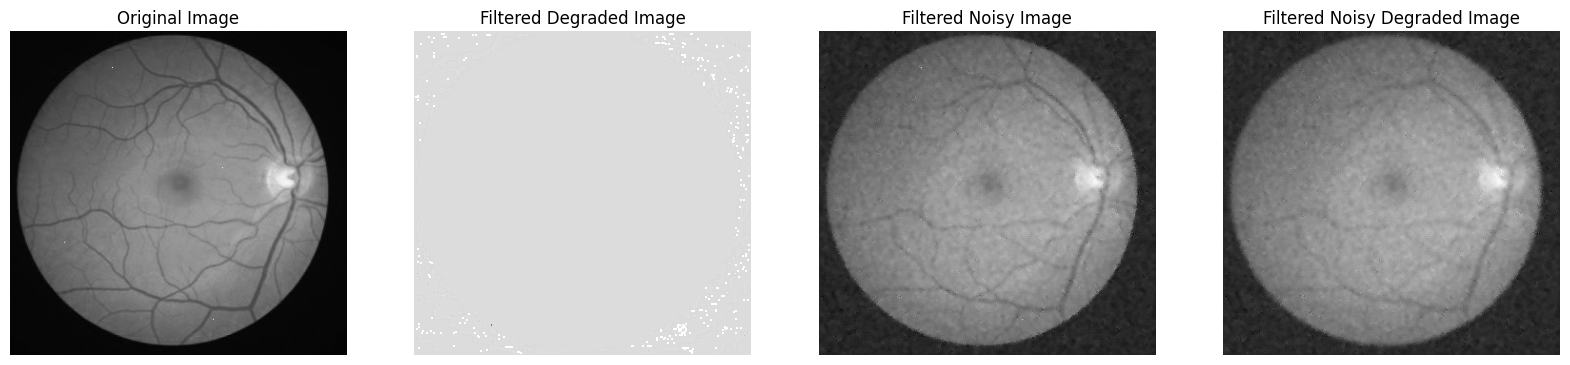

In [ ]:
from scipy.signal import wiener

filtered_degraded_image = wiener(degraded_image, (5, 5))
filtered_noisy_image = wiener(noisy_image, (5, 5))
filtered_noisy_degraded_img = wiener(noisy_degraded_img, (5, 5))



plt.figure(figsize=(20, 20))
plt.subplot(2,4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,4, 2)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.axis('off')

plt.subplot(2,4, 3)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(2,4, 4)
plt.imshow(noisy_degraded_img, cmap='gray')
plt.title('Noisy Degraded Image')
plt.axis('off')

plt.figure(figsize=(20, 20))
plt.subplot(2,4, 5)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,4, 6)
plt.imshow(filtered_degraded_image, cmap='gray')
plt.title('Filtered Degraded Image')
plt.axis('off')

plt.subplot(2,4, 7)
plt.imshow(filtered_noisy_image, cmap='gray')
plt.title('Filtered Noisy Image')
plt.axis('off')

plt.subplot(2,4, 8)
plt.imshow(filtered_noisy_degraded_img, cmap='gray')
plt.title('Filtered Noisy Degraded Image')
plt.axis('off')

psnr_n=calculate_psnr(image, filtered_noisy_image)
psnr_d=calculate_psnr(image, filtered_degraded_image)
psnr_nd=calculate_psnr(image, filtered_noisy_degraded_img)

print(f'PSNR for degraded image: {psnr_d} dB')
print(f'PSNR for noisy image: {psnr_n} dB')
print(f'PSNR for reconstructed image: {psnr_nd} dB')

در تصاویر بازیابی شده با فیلتر وینر تصویر تنها degredation  به درستی بازیابی نشده است و شاید به این دلیل است که فیلتر وینر خود پایتون به درستی نوشته نشده است و اگر این فیلتر را با متلب میزدیم نتیجه بهتری میداد

ولی برای تصاویر نویز تنها و نویز همراه دیگریشن
برای تصویر تنها نویزی مقدار این عبارت بیشتر است که نشان میدهد نتیجه برای تنها نویزی بهتر بوده است و به صورت کلی زمانی که از فیلتر دیگریشن عبور میکند تصویر بیشتر خراب میشود.

# ***Q6***

# **الف**

(-0.5, 536.5, 629.5, -0.5)

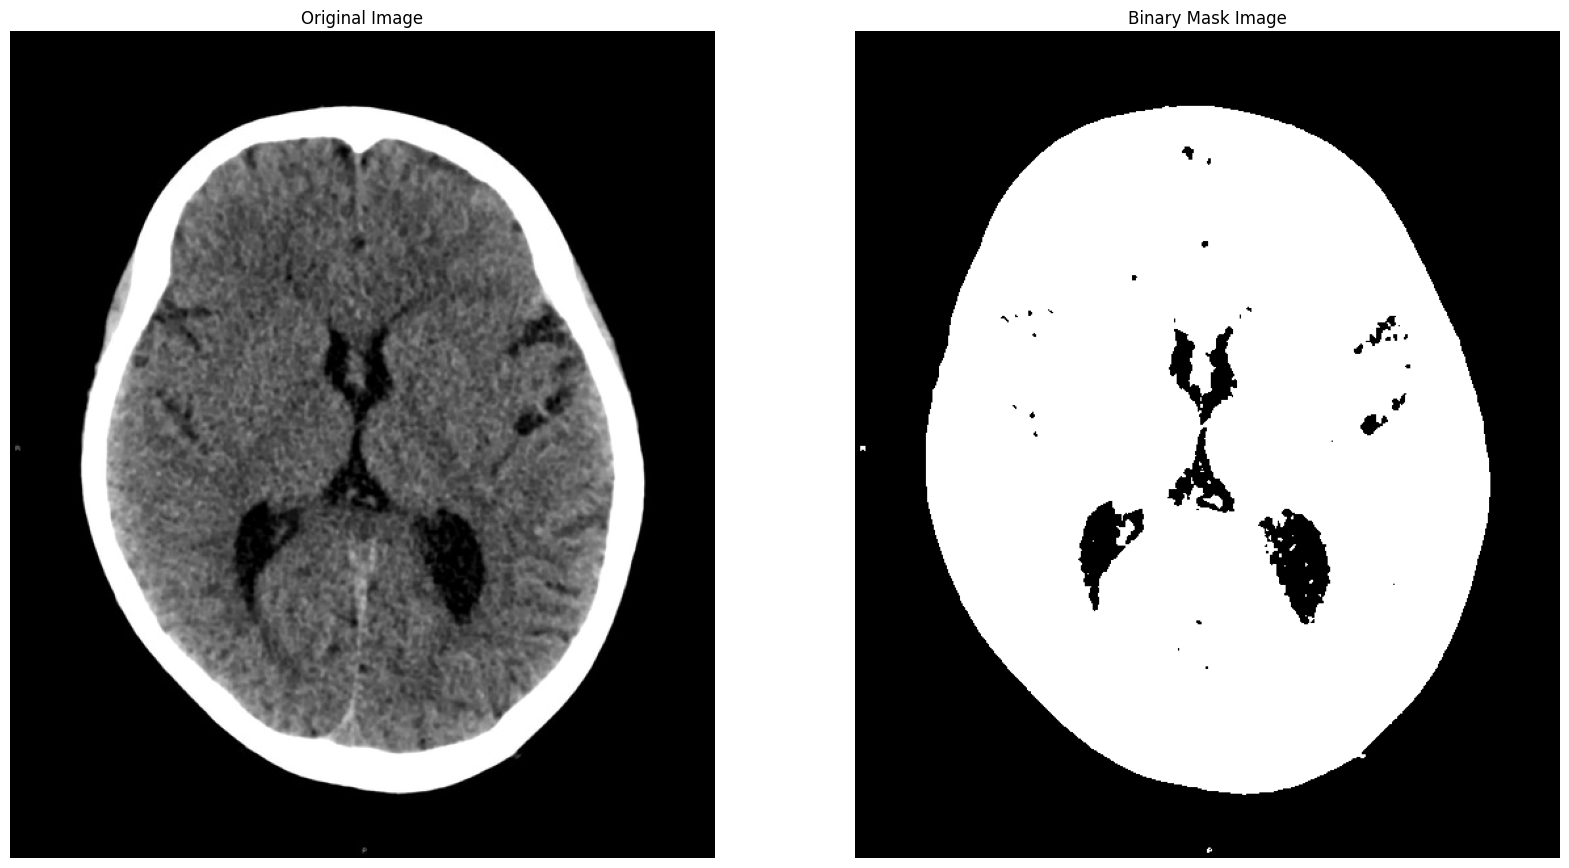

In [29]:
import cv2

file_path = '/content/drive/MyDrive/MIAP/brain_ct.jpeg'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

threshold_value = 30

binary_mask = (image > threshold_value).astype(int)

plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask Image')
plt.axis('off')

به ازای هر مقدار ترشولدی بین 1 تا 50 حدودا ماسک مناسبی تولید میشود که البته هر چقدر مقدار ترشولد را نزدیک 1 قرار دهیم حفره ها کمتر میشوند ولی نقاط بک گراند بیشتری به عنوان ماسک انتخاب میشوند

# **ب**

(-0.5, 536.5, 629.5, -0.5)

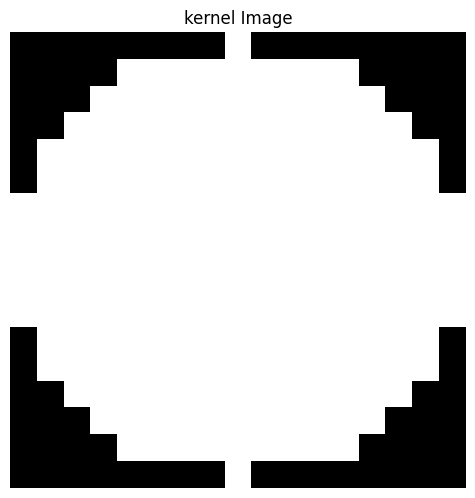

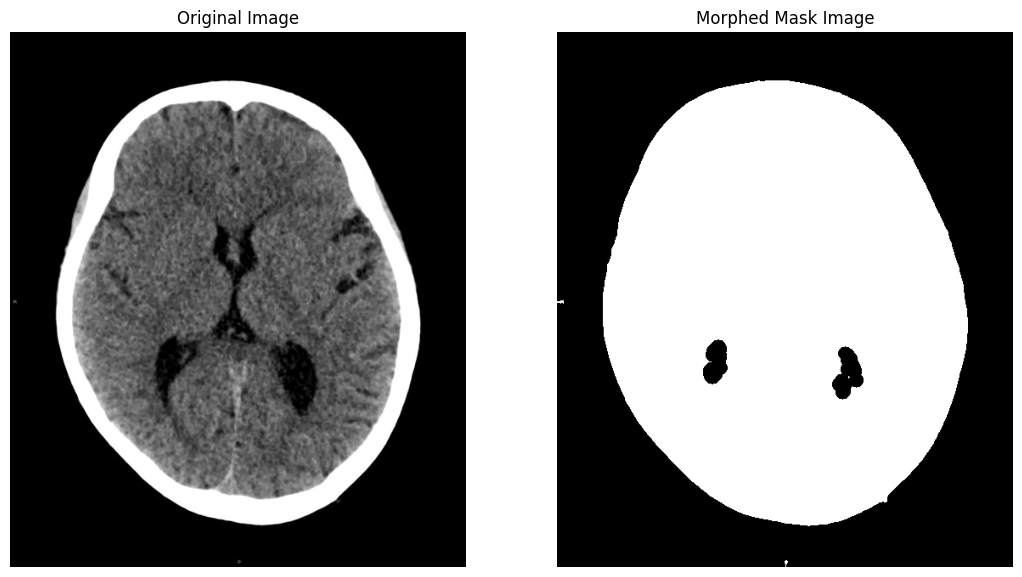

In [30]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17,17))
morphed_mask = cv2.morphologyEx(binary_mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(kernel, cmap='gray')
plt.title('kernel Image')
plt.axis('off')
plt.figure(figsize=(20, 20))
plt.subplot(1,3,2)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3, 3)
plt.imshow(morphed_mask, cmap='gray')
plt.title('Morphed Mask Image')
plt.axis('off')

در شکل بالا با استفاده از یک ماسک دایروی حفره ها را تا حد زیادی بستیم

# **ج**

(-0.5, 536.5, 629.5, -0.5)

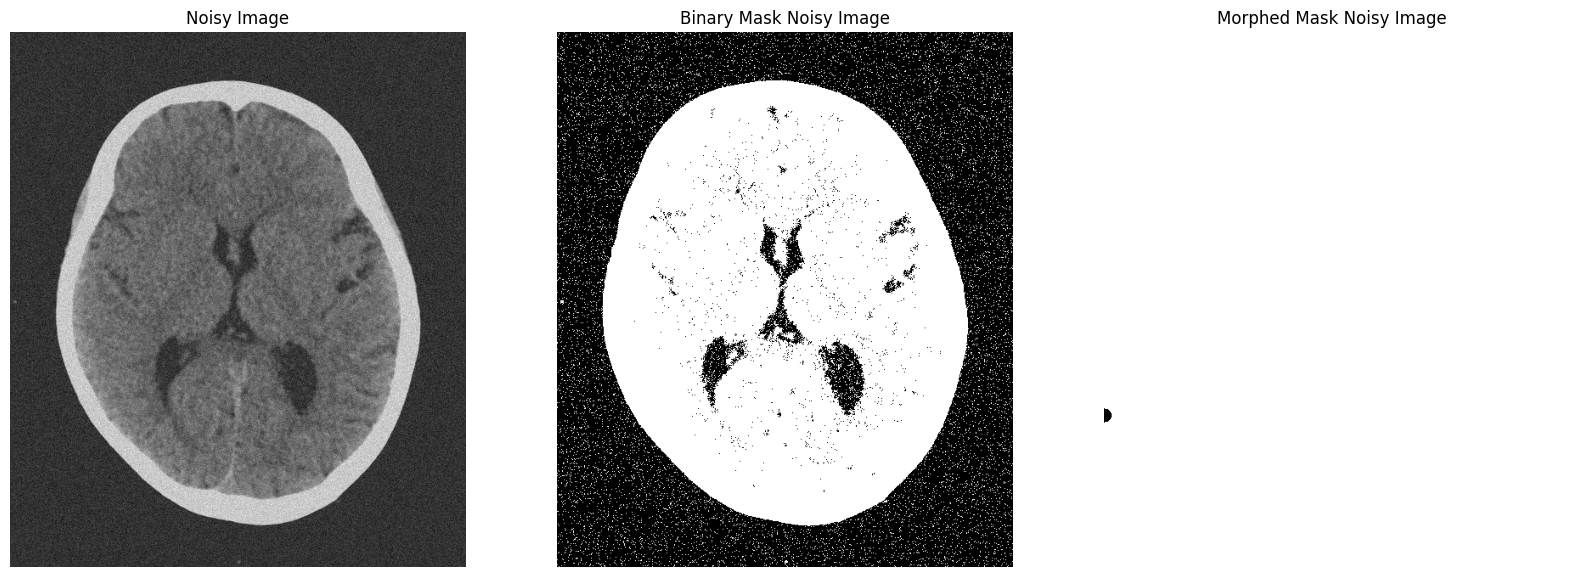

In [31]:
noisy_image = image + np.random.normal(0, 20, image.shape)

binary_mask_noisy = (noisy_image > threshold_value).astype(int)
morphed_mask_noisy = cv2.morphologyEx(binary_mask_noisy.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1,3, 2)
plt.imshow(binary_mask_noisy, cmap='gray')
plt.title('Binary Mask Noisy Image')
plt.axis('off')

plt.subplot(1,3, 3)
plt.imshow(morphed_mask_noisy, cmap='gray')
plt.title('Morphed Mask Noisy Image')
plt.axis('off')

بسته به این که مقدار واریانس نویز در اردر ترشولد باشد ماسک ما نابود میشود


بسته به این که مقدار واریانس نویز گوسی چقدر باشد ماسک ما تفاوت میکند همانطور که در بالا دیدیم واریانس نویز در اردر ترشولد است و ماسک ما به شدت خراب شده است در زیر نویز کمتر از ترشولد قرار میدهیم و میبینیم ماسک زیاد تغییر نمیکند.

(-0.5, 536.5, 629.5, -0.5)

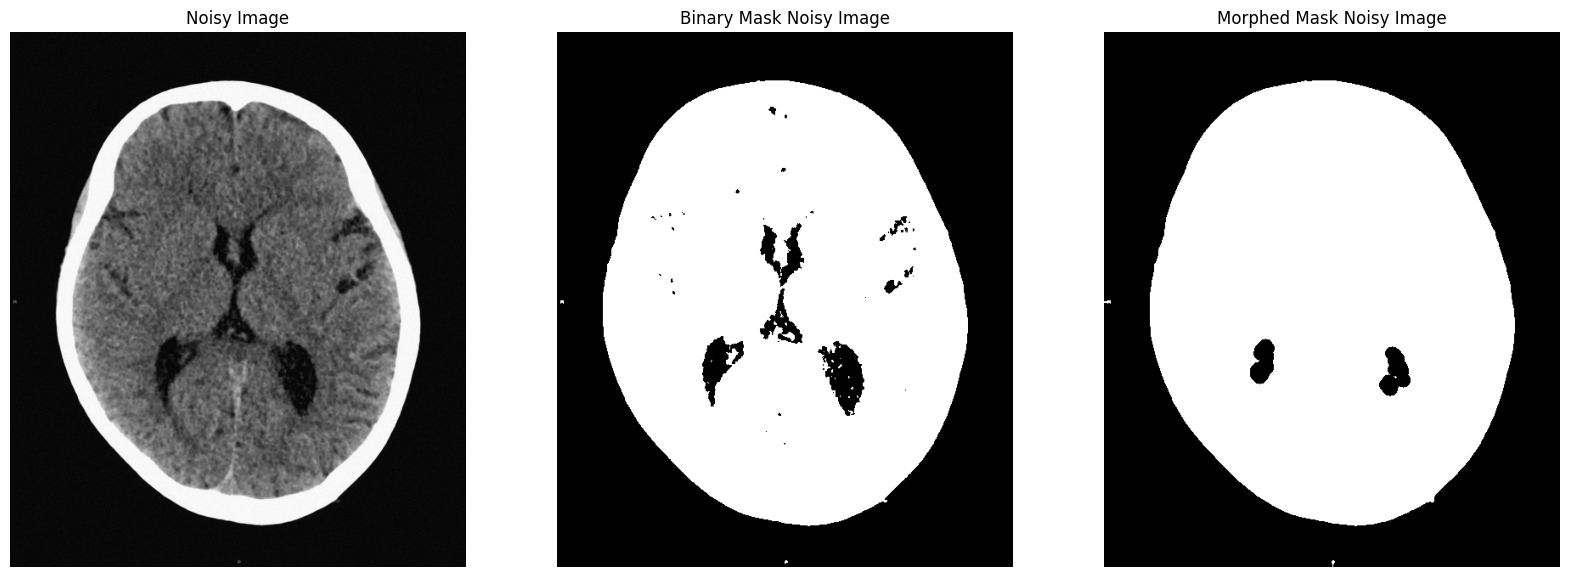

In [32]:
noisy_image = image + np.random.normal(0, 2, image.shape)

binary_mask_noisy = (noisy_image > threshold_value).astype(int)
morphed_mask_noisy = cv2.morphologyEx(binary_mask_noisy.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1,3, 2)
plt.imshow(binary_mask_noisy, cmap='gray')
plt.title('Binary Mask Noisy Image')
plt.axis('off')

plt.subplot(1,3, 3)
plt.imshow(morphed_mask_noisy, cmap='gray')
plt.title('Morphed Mask Noisy Image')
plt.axis('off')

# ***Q7***

# **الف**

(-0.5, 539.5, 359.5, -0.5)

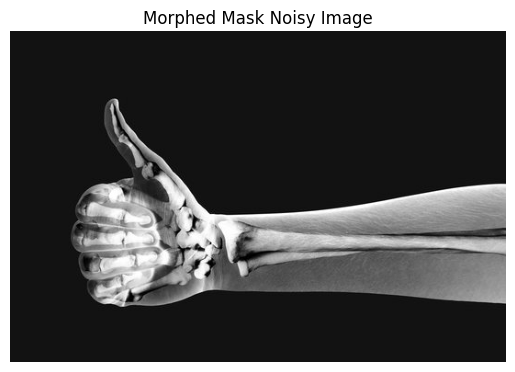

In [33]:
import cv2
import numpy as np

file_path = '/content/drive/MyDrive/MIAP/pca_xray.jpg'

image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Morphed Mask Noisy Image')
plt.axis('off')

In [34]:
image.shape

(360, 540)

در بالا تصویر و ابعاد آن را میبینید

(-0.5, 539.5, 359.5, -0.5)

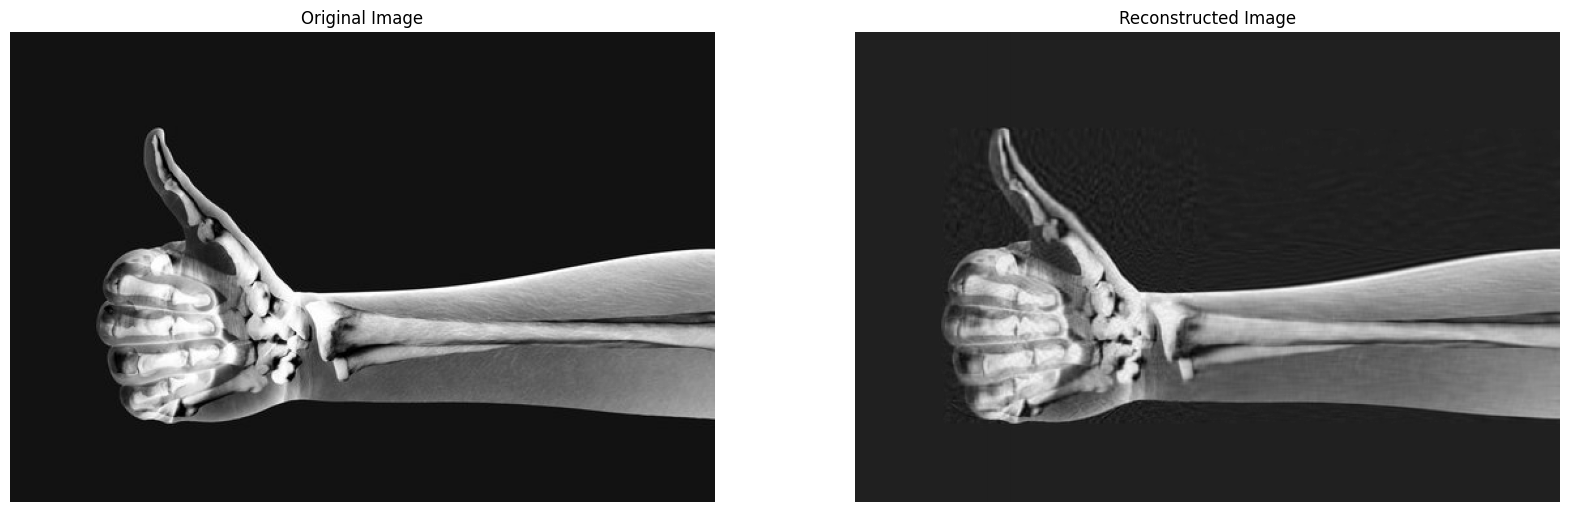

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(image)

image_reconstructed = pca.inverse_transform(pca.transform(image))


plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(1,2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

درتصاویر بالا یکی تصویر اصلی سمت چپ و تصویر کاهش بعد داده شده سمت راست است که میبینیم تا حد خوبی جزییات باقی مانده است

# **ب**

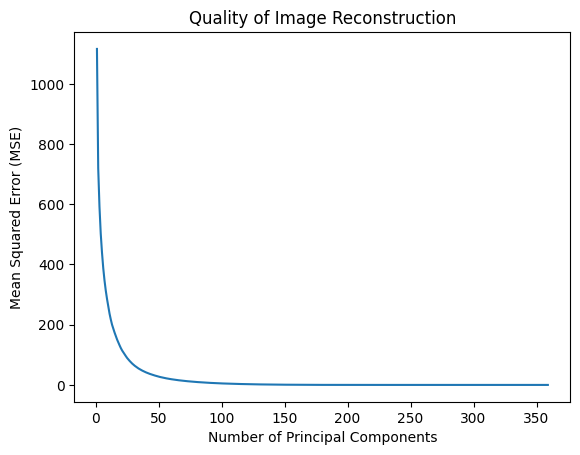

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
components = range(1, 360)

mse_values = []
for n_c in components:
    pca = PCA(n_components=n_c)
    pca.fit(image)
    image_reconstructed = pca.inverse_transform(pca.transform(image))
    mse = mean_squared_error(image, image_reconstructed)
    mse_values.append(mse)

plt.plot(components, mse_values)
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Quality of Image Reconstruction')
plt.show()


در نمودار بالا میبینیم که از 50 نمونه به بعد حدودا ارور ما ثابت مانده است و تغییرات زیادی نکرده است.و از 100 ویژگی به بعد تقریبا ثابت مانده است و خطا نزدیک 0 میباشد.

# **Q8**


# **الف**

تبدیل‌های transform hat-top و transform hat-bottom به عنوان دو تبدیل ریاضی در پردازش تصویر استفاده می‌شوند. این تبدیل‌ها به منظور تشخیص لبه‌ها و نقاط مهم در تصویر استفاده می‌شوند.

1. **Transform Hat-Top (THt)**:
   - تبدیل transform hat-top برای تشخیص نقاط روشن و مهم در تصویر استفاده می‌شود.
   - این تبدیل با استفاده از عملگر opening اعمال می‌شود.
   - معادله تبدیل transform hat-top بر حسب عملگر opening به صورت زیر است:
     \\[ THt = f - (f \\circ B) \\]
     که در اینجا \\( f \\) تصویر اصلی و \\( B \\) عملگر opening است.

2. **Transform Hat-Bottom (THb)**:
   - تبدیل transform hat-bottom برای تشخیص نقاط تاریک و مهم در تصویر استفاده می‌شود.
   - این تبدیل با استفاده از عملگر closing اعمال می‌شود.
   - معادله تبدیل transform hat-bottom بر حسب عملگر closing به صورت زیر است:
     \\[ THb = (f \\bullet B) - f \\]
     که در اینجا \\( f \\) تصویر اصلی و \\( B \\) عملگر closing است.

این تبدیل‌ها به خوبی برای تشخیص لبه‌ها، نقاط مهم و الگوهای خاص در تصویر مناسب هستند. از آن‌جایی که از عملگر opening و closing استفاده می‌کنند، قابلیت فیلترینگ و جداسازی نقاط مورد نظر را دارند.

# **ب**

(-0.5, 242.5, 206.5, -0.5)

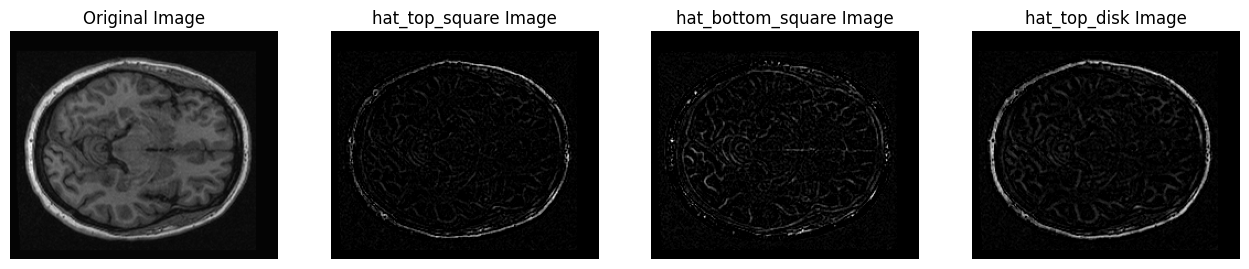

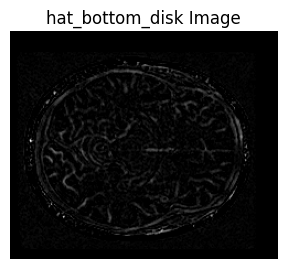

In [37]:
import cv2
import numpy as np


file_path = '/content/drive/MyDrive/MIAP/mri_low_contrast.png'
mri_low_contrast = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

mask_square = np.ones((3, 3), np.uint8)
hat_top_square = cv2.subtract(mri_low_contrast, cv2.morphologyEx(mri_low_contrast, cv2.MORPH_OPEN, mask_square))

hat_bottom_square = cv2.subtract(cv2.morphologyEx(mri_low_contrast, cv2.MORPH_CLOSE, mask_square), mri_low_contrast)

mask_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

hat_top_disk = cv2.subtract(mri_low_contrast, cv2.morphologyEx(mri_low_contrast, cv2.MORPH_OPEN, mask_disk))

hat_bottom_disk = cv2.subtract(cv2.morphologyEx(mri_low_contrast, cv2.MORPH_CLOSE, mask_disk), mri_low_contrast)

cv2.imwrite('hat_top_square.jpg', hat_top_square)
cv2.imwrite('hat_bottom_square.jpg', hat_bottom_square)
cv2.imwrite('hat_top_disk.jpg', hat_top_disk)
cv2.imwrite('hat_bottom_disk.jpg', hat_bottom_disk)



plt.figure(figsize=(20, 20))
plt.subplot(1,5, 1)
plt.imshow(mri_low_contrast, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5, 2)
plt.imshow(hat_top_square, cmap='gray')
plt.title('hat_top_square Image')
plt.axis('off')

plt.subplot(1,5, 3)
plt.imshow(hat_bottom_square, cmap='gray')
plt.title('hat_bottom_square Image')
plt.axis('off')

plt.subplot(1,5, 4)
plt.imshow(hat_top_disk, cmap='gray')
plt.title('hat_top_disk Image')
plt.axis('off')

plt.figure(figsize=(20, 20))
plt.subplot(1,5, 5)
plt.imshow(hat_bottom_disk, cmap='gray')
plt.title('hat_bottom_disk Image')
plt.axis('off')


در تصاویر بال  تبدیلات را با دو نوع ماسک مربعی وو دایروی اعمال کردیم
همان طور که میبینیم تبدیلات تاپ نقاط روشن را برجسته تر کرده اند و تبدیلات دان نقاط تیره را برجسته تر کرده اند.

# **ج**

(-0.5, 242.5, 206.5, -0.5)

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

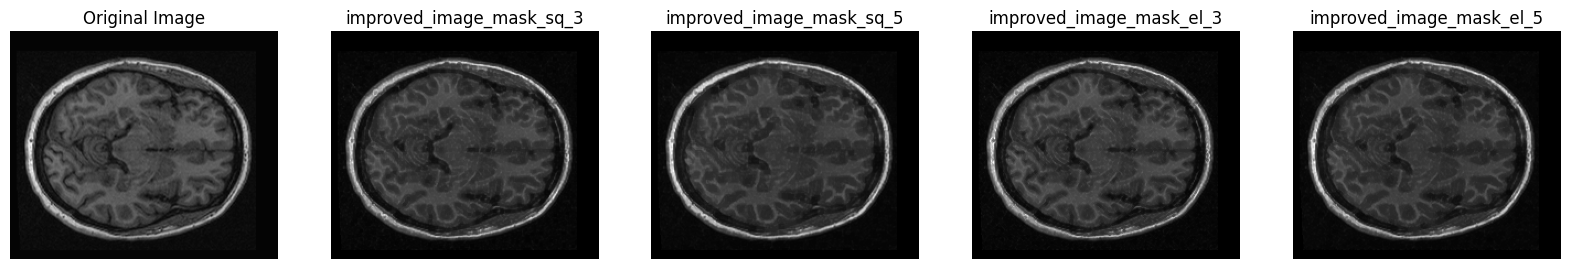

In [39]:
import cv2
import numpy as np

plt.figure(figsize=(20, 20))


opening = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
closing = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
improved_image_sq_3 = cv2.addWeighted(mri_low_contrast, 1, cv2.subtract(closing, opening), 1, 0)
cv2.imwrite('improved_image_mask_sq_3.jpg', improved_image_sq_3)
plt.figure(figsize=(20, 20))


opening = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))
closing = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))
improved_image_sq_5 = cv2.addWeighted(mri_low_contrast, 1, cv2.subtract(closing, opening), 1, 0)
cv2.imwrite('improved_image_mask_sq_5.jpg', improved_image_sq_5)
plt.figure(figsize=(20, 20))


opening = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
closing = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
improved_image_el_3 = cv2.addWeighted(mri_low_contrast, 1, cv2.subtract(closing, opening), 1, 0)
cv2.imwrite('improved_image_mask_el_3.jpg', improved_image_el_3)
plt.figure(figsize=(20, 20))


opening = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
closing = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
improved_image_el_5 = cv2.addWeighted(mri_low_contrast, 1, cv2.subtract(closing, opening), 1, 0)
cv2.imwrite('improved_image_mask_el_5.jpg', improved_image_el_5)
plt.figure(figsize=(20, 20))
plt.subplot(1,5, 1)
plt.imshow(mri_low_contrast, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,5, 2)
plt.imshow(improved_image_sq_3, cmap='gray')
plt.title('improved_image_mask_sq_3')
plt.axis('off')
plt.subplot(1,5, 3)
plt.imshow(improved_image_sq_5, cmap='gray')
plt.title('improved_image_mask_sq_5')
plt.axis('off')
plt.subplot(1,5, 4)
plt.imshow(improved_image_el_3, cmap='gray')
plt.title('improved_image_mask_el_3')
plt.axis('off')
plt.subplot(1,5, 5)
plt.imshow(improved_image_el_5, cmap='gray')
plt.title('improved_image_mask_el_5')
plt.axis('off')

در تصاویر بالا میبینیم هر چقدر اندازه ماسک بیشتر شده نتیجه بهتر بوده است و کنتراست تصاویر بالا تر رفته است

دو ماسک دایروی و مربعی داریم با سایز های 3 و 5 تایی که به نظر میرسد تصویر دایروی کنتراست تصویر بیشتر از تصویر های کروی شده است.

# ***امتیازی**

Selecting a mask in proper shape and size to take morphological actions has a key role in achieving desired results and reducing calculation time. In general, the shape and size of a mask are arbitrarily selected; however, the selected mask should be in appropriate shape and size for various diagnosis purposes. Disk-shaped masks (Figure 1) are more commonly used for medical images than other masks. As stated before, since disk-shaped masks are independent of changes in rotation, they are chosen for medical images. Since big or small masks strengthen or weaken various parts of an image, it is impossible to gather detailed information on the contrast of different images using only one structural element. This is why one mask in a particular shape and size may not appropriate for other applications [9] . In the proposed method, the change in shape and size of the mask continues until an appropriate result obtained. It should be mentioned that past experiences have key roles in selecting proper masks to take morphological actions.



با توجه به توضیحات بالا که در یک سایت اینترنت بود میبینیم که توضیح داده است که ماسک های دایروی بیشتر در تصاویر پزشکی استفاده می شوند و این به این دلیل است که ماسک های دایروی نسبت به دوران مستقل عمل میکنند بر خلاف ماسک های مربعی

# **د**

In [40]:
def calculate_CIR(image, improved_image, region):
    contrast_values_img = []
    contrast_values_impr_img = []
    for x in range(region):
      for y in range(region):
        p1 = np.mean(image[x-1:x+2, y-1:y+2])
        a1 = np.mean(image[x-3:x+4, y-3:y+4])
        c1 = abs(p1 - a1) / abs(p1 + a1)

        p = np.mean(improved_image[x-1:x+2, y-1:y+2])
        a = np.mean(improved_image[x-3:x+4, y-3:y+4])
        c = abs(p - a) / abs(p + a)
        if (abs(p + a) )>0 and abs(p1 + a1)>0  :
          contrast_values_impr_img.append(c)
          contrast_values_img.append(c1)
    contrast_values_img = np.array(contrast_values_img)
    contrast_values_impr_img = np.array(contrast_values_impr_img)
    CIR = np.sum((contrast_values_img - contrast_values_impr_img)**2) /np.sum((contrast_values_img)**2)
    return CIR


shapes=mri_low_contrast.shape
minreg=min([shapes[0],shapes[1]])
CIR_value = calculate_CIR(mri_low_contrast, improved_image_el_5, minreg)
print("CIR value for the specified region:", CIR_value)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


CIR value for the specified region: 0.24391848888006123


در شکل بالا تابع مورد نظر را نوشته ایم فقط چون ناحیه خاصی مد نظر مان نبوده برای کل تصویر این را حساب کرده ایم.
که برابر شده است با 0.24

# **ه**

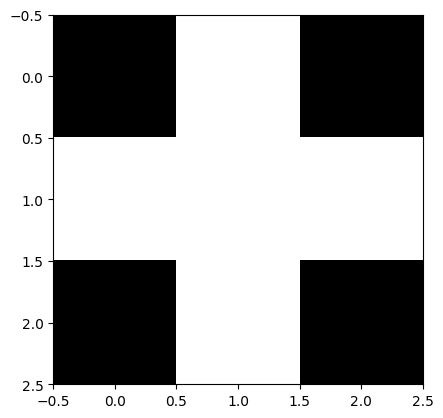

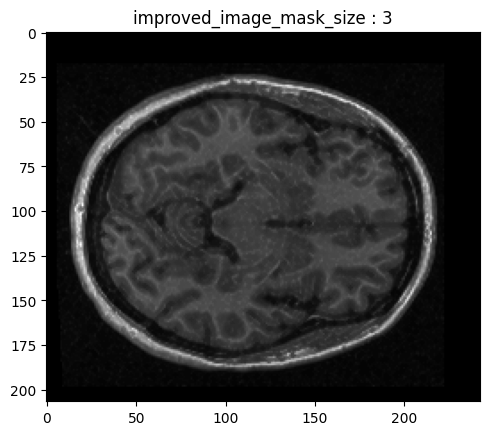

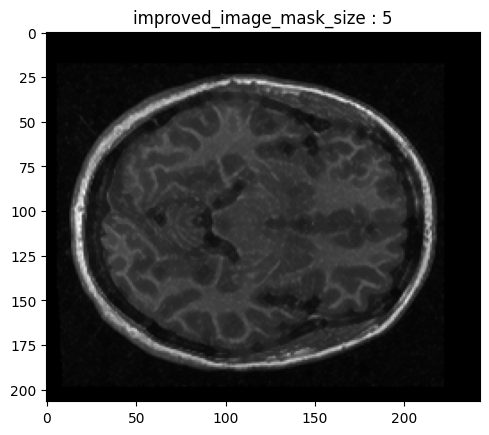

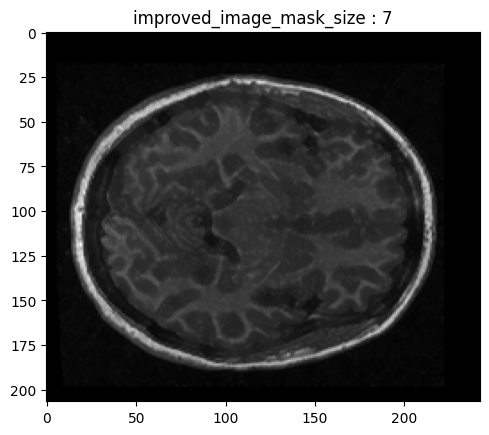

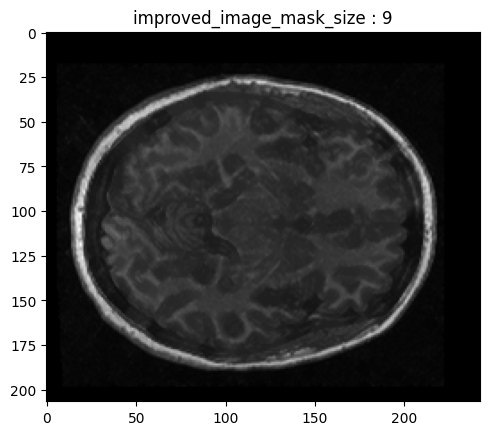

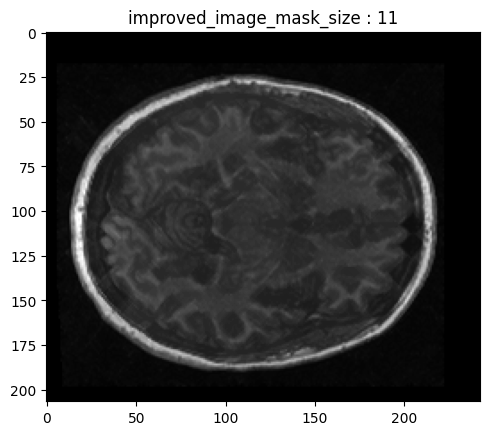

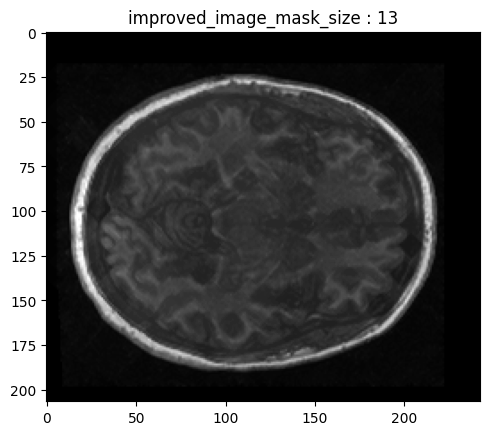

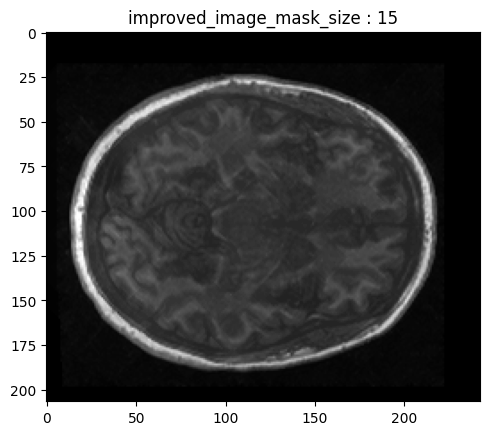

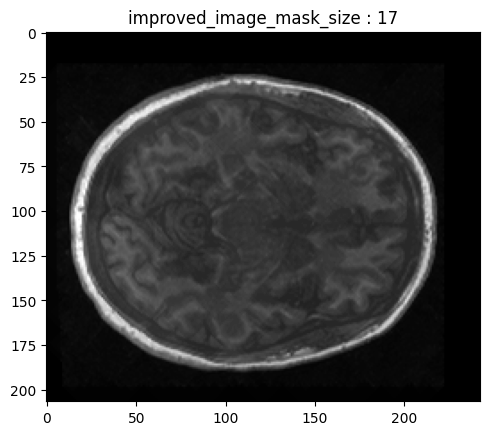

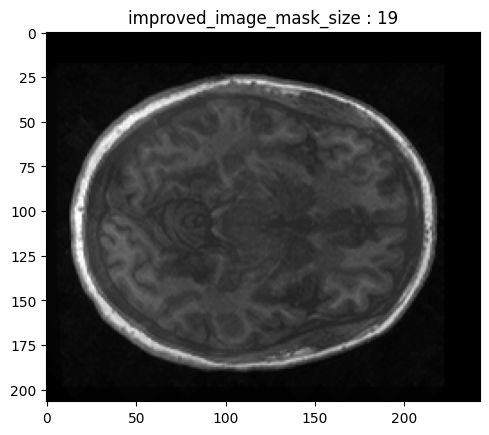

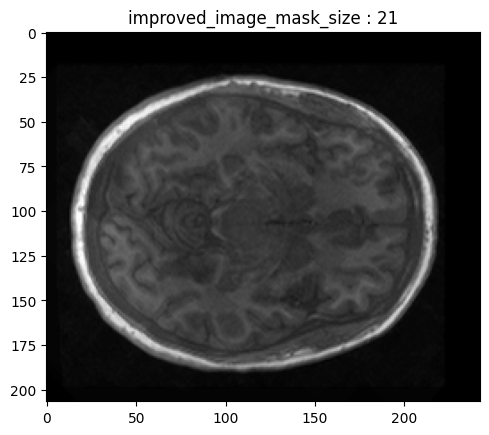

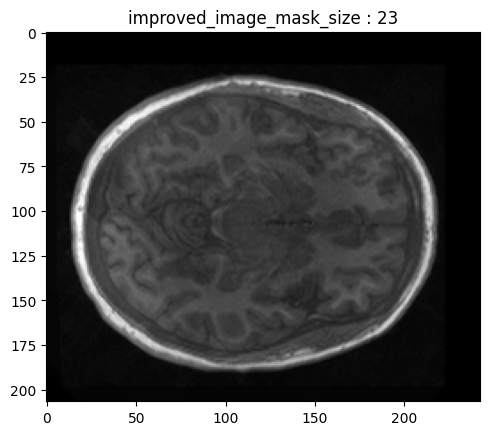

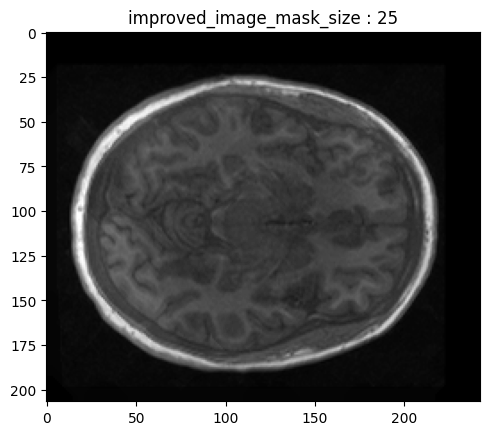

In [43]:
mask_size=3
mask_in=np.zeros((20,20))
mask_in[10,10]=1

shapes=mri_low_contrast.shape
minreg=min([shapes[0],shapes[1]])

plt.imshow(cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (mask_size, mask_size)), cmap='gray')
plt.show()
CIRs=[]
best_CIR=0
for i in range(12):
  mask_in=cv2.dilate(mask_in, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (mask_size, mask_size)))
  mask_in=np.uint8(mask_in)
  opening = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_OPEN, mask_in)
  closing = cv2.morphologyEx(mri_low_contrast, cv2.MORPH_CLOSE, mask_in)
  improved_image = cv2.addWeighted(mri_low_contrast, 1, cv2.subtract(closing, opening), 1, 0)
  CIR_value = calculate_CIR(mri_low_contrast, improved_image, minreg)
  if best_CIR<CIR_value:
   best_improved_img=improved_image
   best_CIR = CIR_value
  CIRs.append(CIR_value)
  plt.imshow(improved_image, cmap='gray')
  plt.title(f'improved_image_mask_size : {(i+1)*2+1}')
  plt.show()

در تصاویر بالا ابتدا یک ماسک با ابعاد 20 در 20 درست کرده ایم که فقط نقطه مرکزی آن ها روشن هست و سپس در هر مرحله با یک ماسک دایروی آن را با دیلیشن سایزش را بزگتر کرده ایم در واقع سایز نواحی سفید بیشتر شده است و تصاویر را نیز به ترتیب بهبود داده ایم و برای هر سایز نمایش داده ایم

In [44]:
max_ind=CIRs.index(max(CIRs))
max_size=(max_ind+1)*2+1
max_size

9

بیشینه مقدار CIR برای موقعی است که سایز ماسک ما 9 در 9 شده است

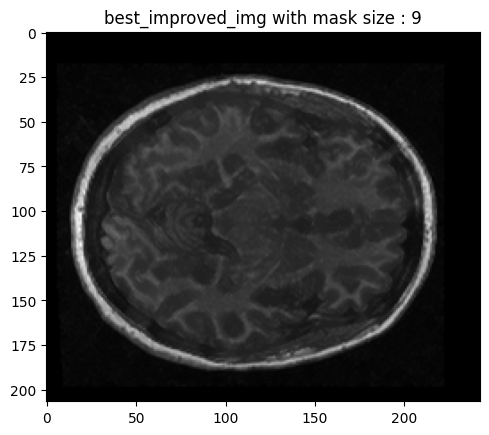

best_CIR :  0.35203157517067324 
 best mask size :  9


In [45]:
plt.imshow(best_improved_img, cmap='gray')
plt.title(f'best_improved_img with mask size : {max_size}')
plt.show()
cv2.imwrite('best_improved_img_with_mask_size_9.jpg', best_improved_img)
print("best_CIR : ",best_CIR , "\n best mask size : ",max_size)

در شکل بالا تصویر بهبود یافته و مقدار CIR را برای ماسک 9 در 9 میبینیم که مقدار CIR آن حدودا 0.35 است و از بقیه حالات بیشتر است.